## Add cancer analysis

description goes here

TODO:
* put results into context (see below)
* average similarity vs. change in performance (higher similarity = more performance improvement?)
* put data loading up front (don't need to reload each time we switch identifiers)

In [1]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pancancer_evaluation.config as cfg
import pancancer_evaluation.utilities.analysis_utilities as au

In [2]:
RESULTS_DIR = os.path.join(cfg.repo_root, 'add_cancer_results', 'add_cancer')

### Load data

In [3]:
add_cancer_df = au.load_add_cancer_results(RESULTS_DIR, load_cancer_types=True)
print(add_cancer_df.shape)
add_cancer_df.sort_values(by=['gene', 'holdout_cancer_type']).head(n=10)

(4548, 12)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,num_train_cancer_types,how_to_add,identifier,train_cancer_types
0,0.98128,0.96627,BRAF,COAD,signal,42,train,0,2,similarity,BRAF_COAD,UCEC COAD THCA
1,0.74925,0.44968,BRAF,COAD,signal,42,test,0,2,similarity,BRAF_COAD,UCEC COAD THCA
2,0.93750,0.89993,BRAF,COAD,signal,42,cv,0,2,similarity,BRAF_COAD,UCEC COAD THCA
3,0.98493,0.97138,BRAF,COAD,signal,42,train,1,2,similarity,BRAF_COAD,UCEC COAD THCA
4,0.64394,0.45539,BRAF,COAD,signal,42,test,1,2,similarity,BRAF_COAD,UCEC COAD THCA
5,0.94046,0.90884,BRAF,COAD,signal,42,cv,1,2,similarity,BRAF_COAD,UCEC COAD THCA
6,0.98633,0.97349,BRAF,COAD,signal,42,train,2,2,similarity,BRAF_COAD,UCEC COAD THCA
7,0.81250,0.48397,BRAF,COAD,signal,42,test,2,2,similarity,BRAF_COAD,UCEC COAD THCA
8,0.93845,0.90846,BRAF,COAD,signal,42,cv,2,2,similarity,BRAF_COAD,UCEC COAD THCA
9,0.98580,0.97297,BRAF,COAD,signal,42,train,3,2,similarity,BRAF_COAD,UCEC COAD THCA


In [4]:
# load data from previous single-cancer and pan-cancer experiments
# TODO: should probably do this de novo with results from the same add cancers run in the future
pancancer_results_dir = '/home/jake/data/pancancer_vogelstein_09_25'
pancancer_dir = os.path.join(pancancer_results_dir, 'pancancer')
pancancer_dir2 = os.path.join(pancancer_results_dir, 'vogelstein_seed1_results', 'pancancer')
single_cancer_dir = os.path.join(pancancer_results_dir, 'single_cancer')
single_cancer_dir2 = os.path.join(pancancer_results_dir, 'vogelstein_seed1_results', 'single_cancer')

In [5]:
single_cancer_df1 = au.load_prediction_results(single_cancer_dir, 'single_cancer')
single_cancer_df2 = au.load_prediction_results(single_cancer_dir2, 'single_cancer')
single_cancer_df = pd.concat((single_cancer_df1, single_cancer_df2))
print(single_cancer_df.shape)
single_cancer_df.head()

(20940, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.99357,0.95200,MAP3K1,BRCA,signal,42,train,0,single_cancer,MAP3K1_BRCA
1,0.69079,0.27286,MAP3K1,BRCA,signal,42,test,0,single_cancer,MAP3K1_BRCA
2,0.74039,0.39101,MAP3K1,BRCA,signal,42,cv,0,single_cancer,MAP3K1_BRCA
3,0.99982,0.99826,MAP3K1,BRCA,signal,42,train,1,single_cancer,MAP3K1_BRCA
4,0.75636,0.62930,MAP3K1,BRCA,signal,42,test,1,single_cancer,MAP3K1_BRCA


In [6]:
pancancer_df1 = au.load_prediction_results(pancancer_dir, 'pancancer')
pancancer_df2 = au.load_prediction_results(pancancer_dir2, 'pancancer')
pancancer_df = pd.concat((pancancer_df1, pancancer_df2))
print(pancancer_df.shape)
pancancer_df.head()

(20760, 10)


,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
0,0.67257,0.30731,MAP3K1,BRCA,signal,42,train,0,pancancer,MAP3K1_BRCA
1,0.64775,0.30118,MAP3K1,BRCA,signal,42,test,0,pancancer,MAP3K1_BRCA
2,0.64893,0.21980,MAP3K1,BRCA,signal,42,cv,0,pancancer,MAP3K1_BRCA
3,0.99443,0.91075,MAP3K1,BRCA,signal,42,train,1,pancancer,MAP3K1_BRCA
4,0.77054,0.54482,MAP3K1,BRCA,signal,42,test,1,pancancer,MAP3K1_BRCA


In [7]:
single_cancer_comparison_df = au.compare_results(single_cancer_df,
                                                 identifier='identifier',
                                                 metric='aupr',
                                                 correction=True,
                                                 correction_alpha=0.001,
                                                 verbose=False)
pancancer_comparison_df = au.compare_results(pancancer_df,
                                             identifier='identifier',
                                             metric='aupr',
                                             correction=True,
                                             correction_alpha=0.001,
                                             verbose=False)

### Plot change in performance as cancers are added

In [8]:
IDENTIFIER = 'BRAF_COAD'
# IDENTIFIER = 'EGFR_ESCA'
# IDENTIFIER = 'EGFR_LGG'
# IDENTIFIER = 'KRAS_CESC'
# IDENTIFIER = 'PIK3CA_ESCA'
# IDENTIFIER = 'PIK3CA_STAD'
# IDENTIFIER = 'PTEN_COAD'

GENE = IDENTIFIER.split('_')[0]
# GENE = 'BRAF'

Text(0, 0.5, 'AUPR')

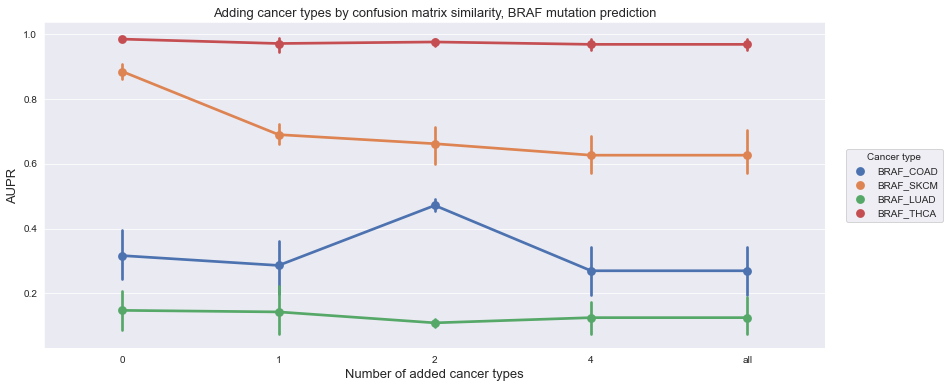

In [9]:
gene_df = add_cancer_df[(add_cancer_df.gene == GENE) &
                        (add_cancer_df.data_type == 'test') &
                        (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
gene_df.num_train_cancer_types = gene_df.num_train_cancer_types.astype(str)
gene_df.loc[(gene_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
sns.pointplot(data=gene_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=['0', '1', '2', '4', 'all'])
plt.legend(bbox_to_anchor=(1.15, 0.5), loc='center right', borderaxespad=0., title='Cancer type')
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(GENE), size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

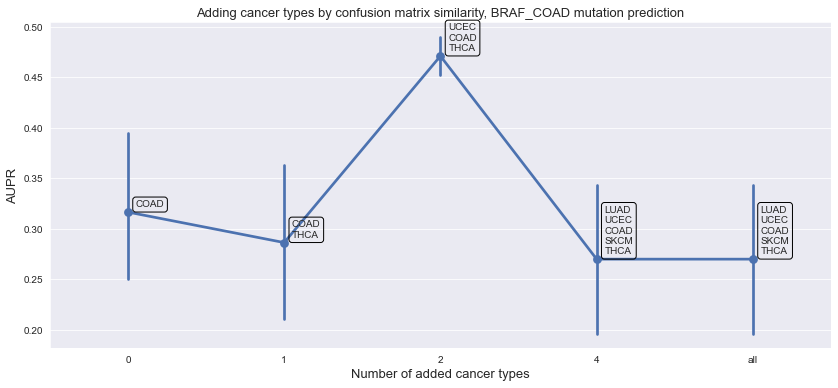

In [10]:
id_df = add_cancer_df[(add_cancer_df.identifier == IDENTIFIER) &
                      (add_cancer_df.data_type == 'test') &
                      (add_cancer_df.signal == 'signal')].copy()

# make seaborn treat x axis as categorical
id_df.num_train_cancer_types = id_df.num_train_cancer_types.astype(str)
id_df.loc[(id_df.num_train_cancer_types == '-1'), 'num_train_cancer_types'] = 'all'

sns.set({'figure.figsize': (14, 6)})
cat_order = ['0', '1', '2', '4', 'all']
sns.pointplot(data=id_df, x='num_train_cancer_types', y='aupr', hue='identifier',
              order=cat_order)
plt.legend([],[], frameon=False)
plt.title('Adding cancer types by confusion matrix similarity, {} mutation prediction'.format(IDENTIFIER),
          size=13)
plt.xlabel('Number of added cancer types', size=13)
plt.ylabel('AUPR', size=13)

# annotate points with cancer types
def label_points(x, y, cancer_types, ax):
    a = pd.DataFrame({'x': x, 'y': y, 'cancer_types': cancer_types})
    for i, point in a.iterrows():
        ax.text(point['x']+0.05,
                point['y']+0.005,
                str(point['cancer_types'].replace(' ', '\n')),
                bbox=dict(facecolor='none', edgecolor='black', boxstyle='round'))

cat_to_loc = {c: i for i, c in enumerate(cat_order)}
group_id_df = (
    id_df.groupby(['num_train_cancer_types', 'train_cancer_types'])
         .mean()
         .reset_index()
)
label_points([cat_to_loc[c] for c in group_id_df.num_train_cancer_types],
              group_id_df.aupr, group_id_df.train_cancer_types, plt.gca())

### Plot gene/cancer type "best model" performance vs. single/pan-cancer models

In [11]:
sc_id_df = single_cancer_df[(single_cancer_df.identifier == IDENTIFIER) &
                            (single_cancer_df.data_type == 'test')].copy()
pc_id_df = pancancer_df[(pancancer_df.identifier == IDENTIFIER) &
                        (pancancer_df.data_type == 'test')].copy()

best_num = (
    id_df.groupby('num_train_cancer_types')
         .mean()
         .reset_index()
         .sort_values(by='aupr', ascending=False)
         .iloc[0, 0]
)
best_id_df = (
    id_df.loc[id_df.num_train_cancer_types == best_num, :]
         .drop(columns=['num_train_cancer_types', 'how_to_add', 'train_cancer_types'])
)
best_id_df['train_set'] = 'best_add'
all_id_df = pd.concat((sc_id_df, best_id_df, pc_id_df), sort=False)
all_id_df.head()

,auroc,aupr,gene,holdout_cancer_type,signal,seed,data_type,fold,train_set,identifier
1,0.80000,0.28448,BRAF,COAD,signal,42,test,0,single_cancer,BRAF_COAD
4,0.38672,0.15410,BRAF,COAD,signal,42,test,1,single_cancer,BRAF_COAD
7,0.44192,0.20045,BRAF,COAD,signal,42,test,2,single_cancer,BRAF_COAD
10,0.83881,0.57927,BRAF,COAD,signal,42,test,3,single_cancer,BRAF_COAD
1,0.51029,0.31967,BRAF,COAD,shuffled,42,test,0,single_cancer,BRAF_COAD


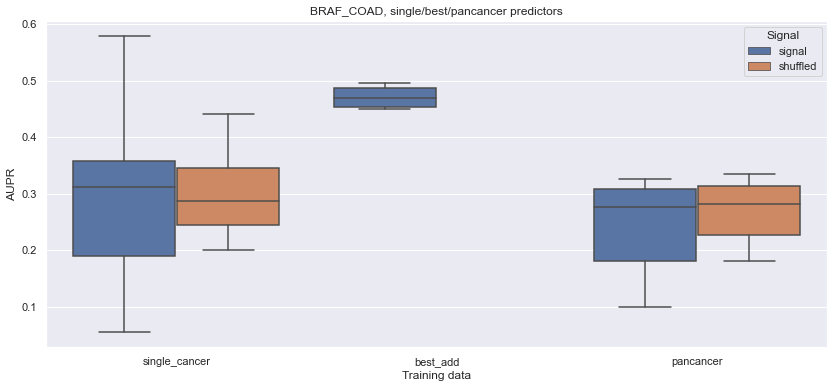

In [12]:
# TODO: which (if any) are significant?
sns.set()
sns.boxplot(data=all_id_df, x='train_set', y='aupr', hue='signal', hue_order=['signal', 'shuffled'])
plt.title('{}, single/best/pancancer predictors'.format(IDENTIFIER))
plt.xlabel('Training data')
plt.ylabel('AUPR')
plt.legend(title='Signal')

In [13]:
print('Single cancer significance: {}'.format(
    single_cancer_comparison_df.loc[single_cancer_comparison_df.identifier == IDENTIFIER, 'reject_null'].values[0]
))
print('Pan-cancer significance: {}'.format(
    pancancer_comparison_df.loc[pancancer_comparison_df.identifier == IDENTIFIER, 'reject_null'].values[0]
))

Single cancer significance: False
Pan-cancer significance: False


In [14]:
# Q2: where is this example in the single vs. pan-cancer volcano plot?
# see pancancer only experiments for an example of this sort of thing